<a href="https://colab.research.google.com/github/PrabhaviWKP/Machine-Learning/blob/main/notebooks/2604CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [60]:
data = pd.read_csv('/content/bank-full.csv', delimiter=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [61]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [62]:
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [63]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Exploratory Data Analysis

In [64]:
data.shape
print('Dimensions of the dataset', data.shape)
print('Columns', data.columns)

Dimensions of the dataset (45211, 17)
Columns Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [65]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [66]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [67]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [68]:
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [69]:
data.duplicated().sum()

0

In [70]:
categorical_columns = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        categorical_columns.append(x)
print('Categorical Columns', categorical_columns)

numerical_columns = []
for x in data.dtypes.index:
    if data.dtypes[x] != 'object':
        numerical_columns.append(x)
print('Numerical Columns', numerical_columns)

Categorical Columns ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Numerical Columns ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [71]:
data.nunique().to_frame('Count of unique values')

,Count of unique values
age,77
job,12
marital,3
education,4
default,2
balance,7168
housing,2
loan,2
contact,3
day,31


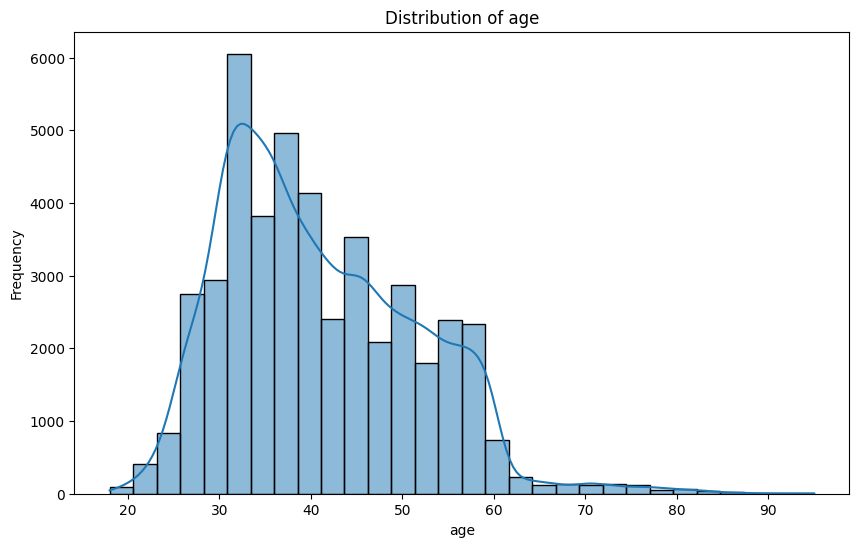

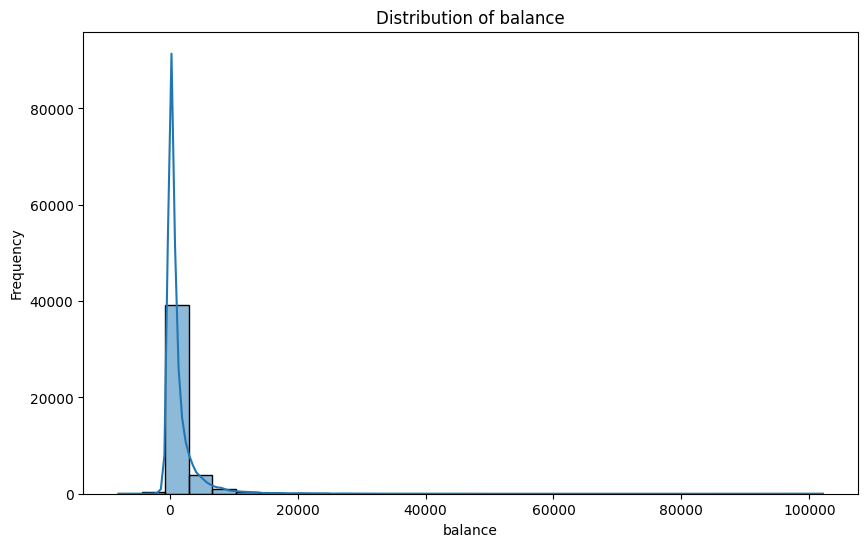

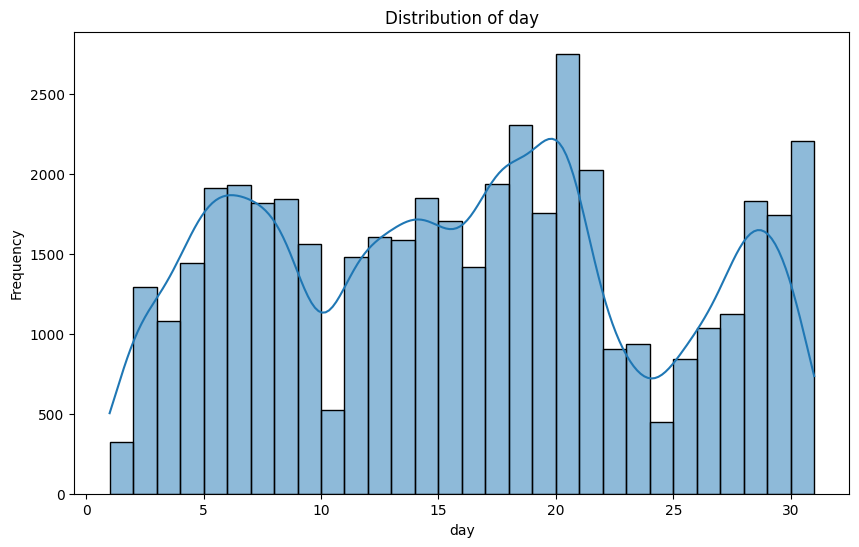

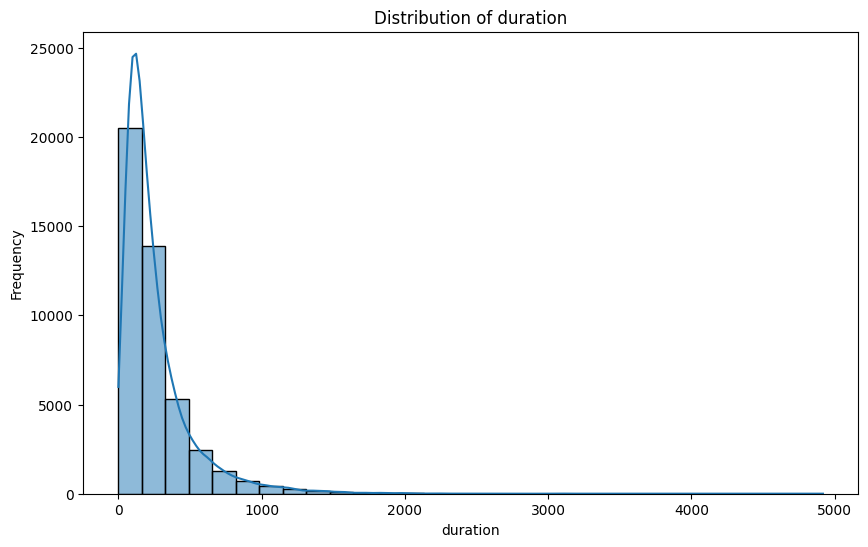

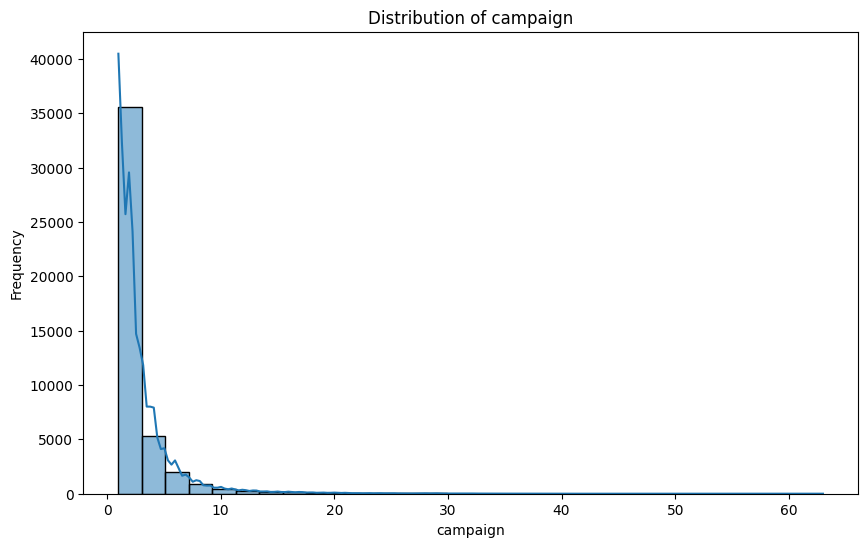

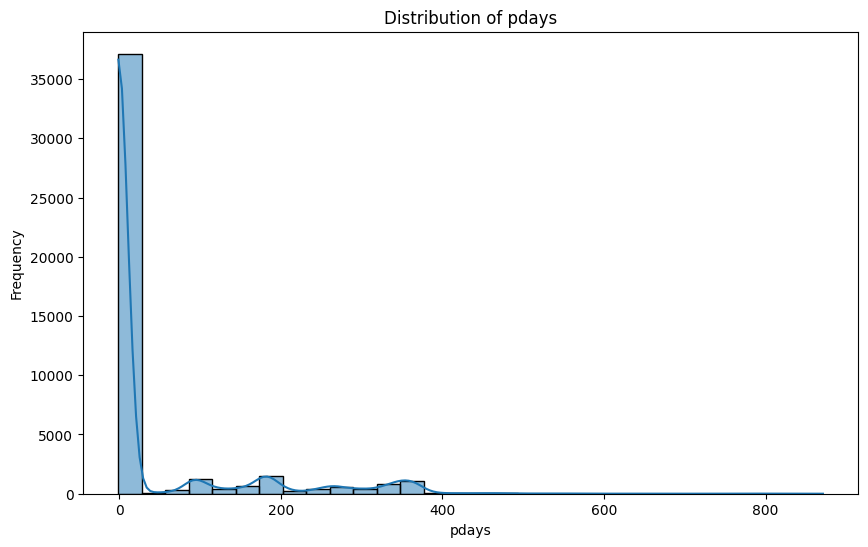

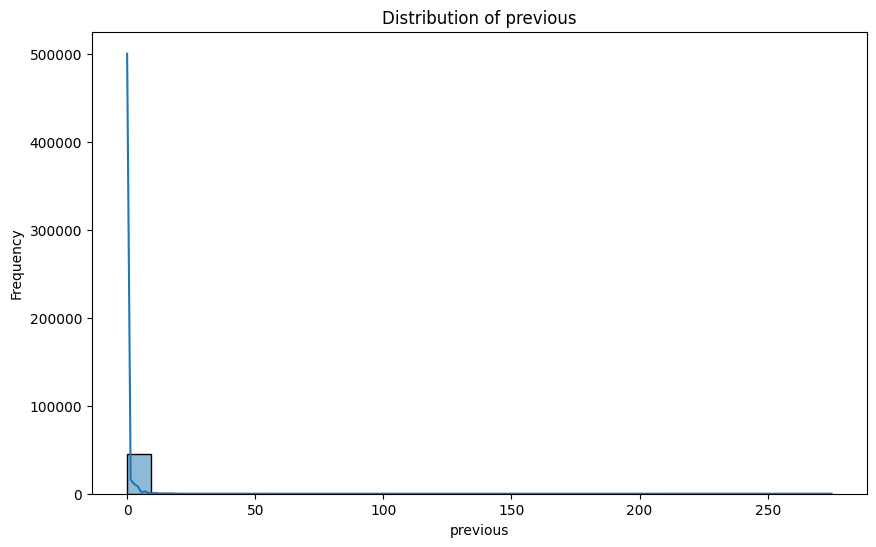

In [72]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

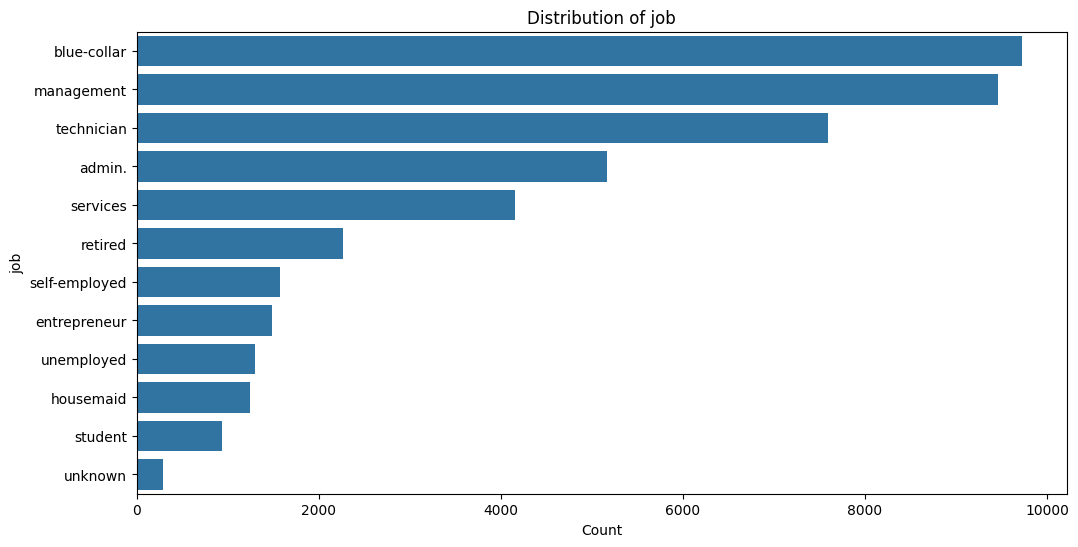

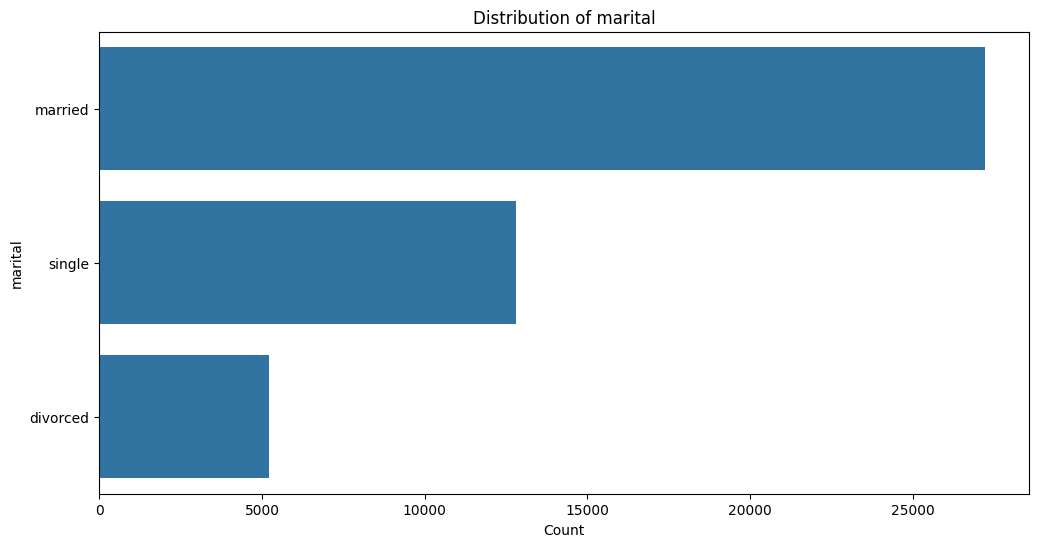

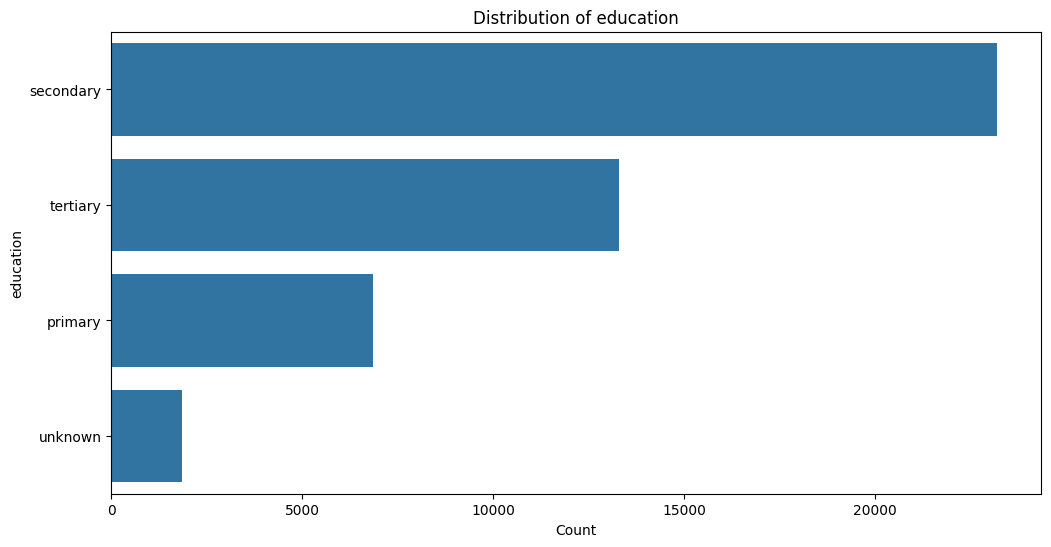

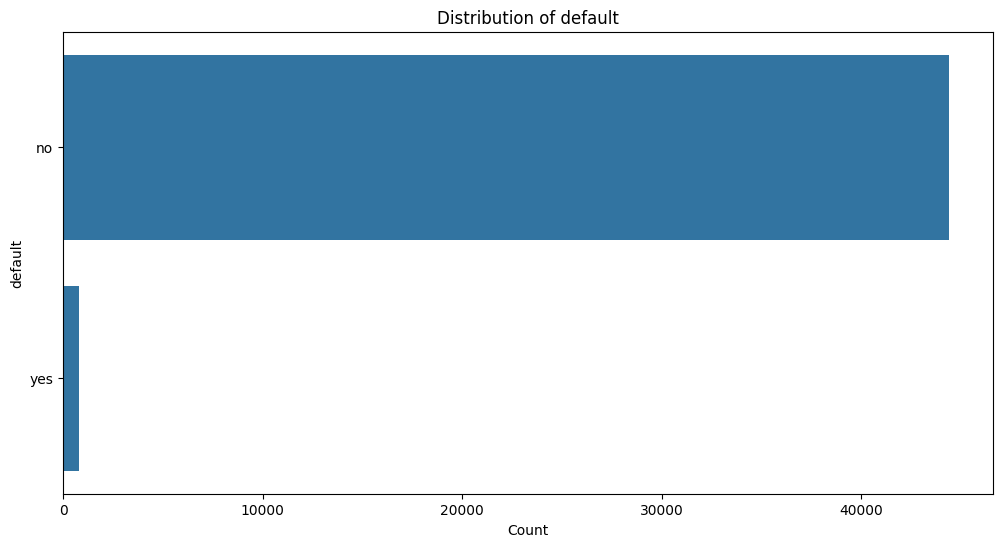

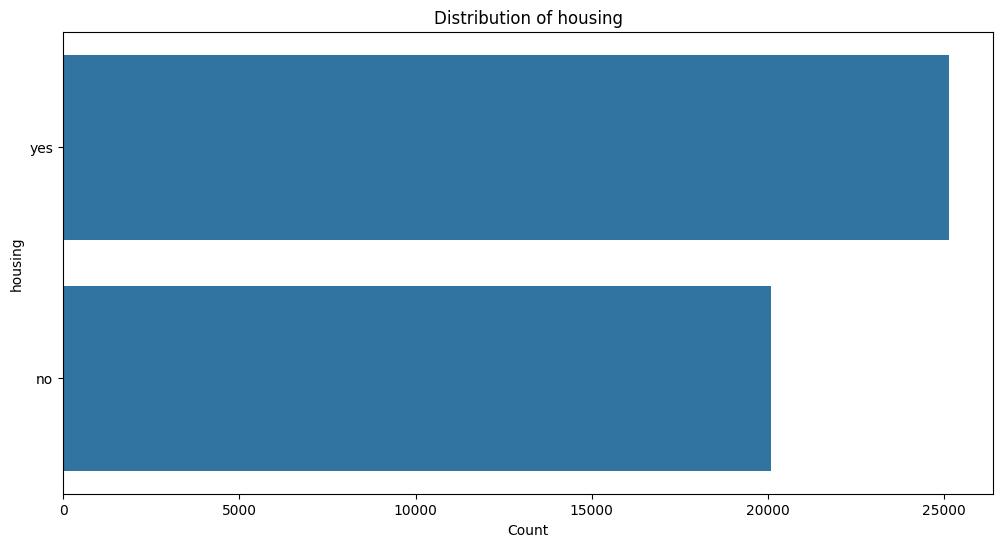

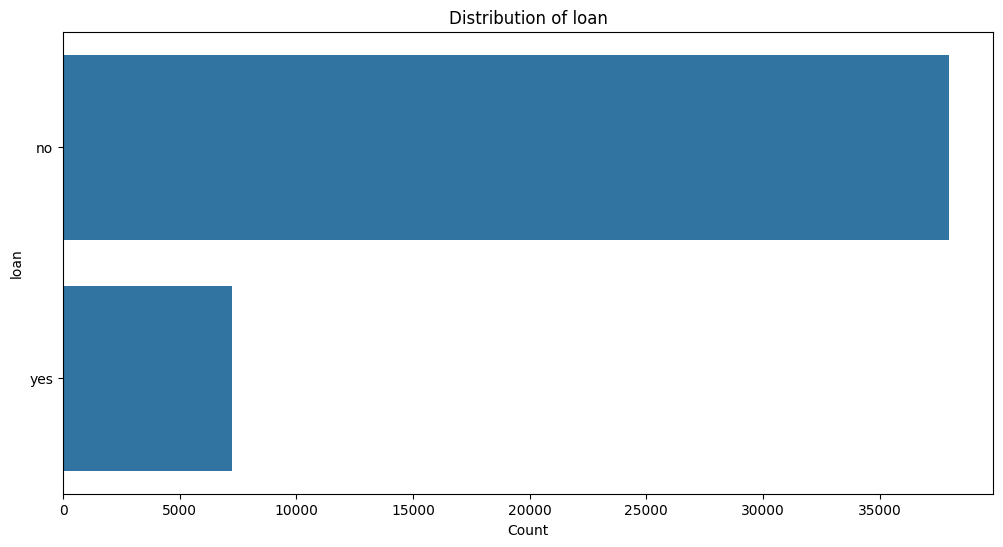

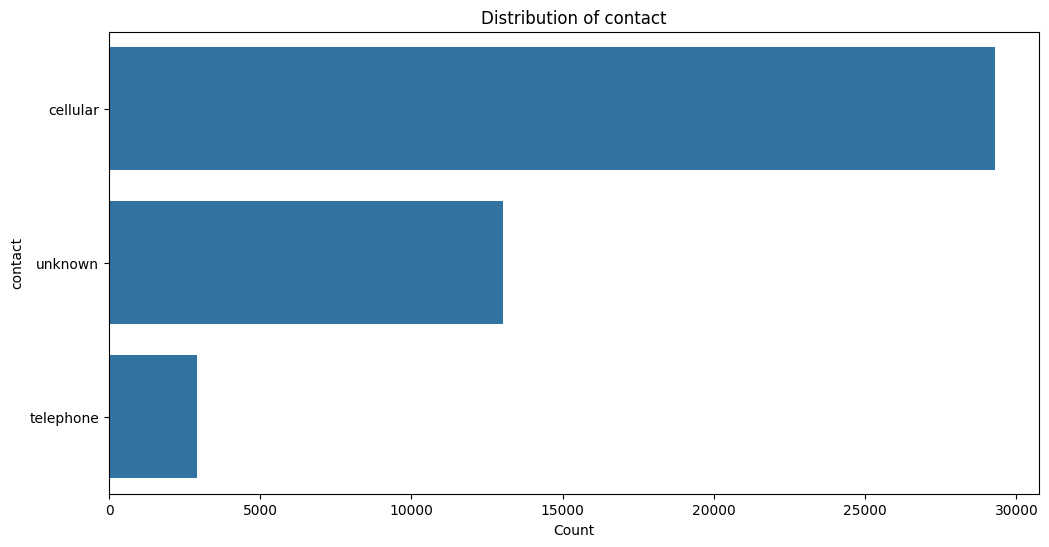

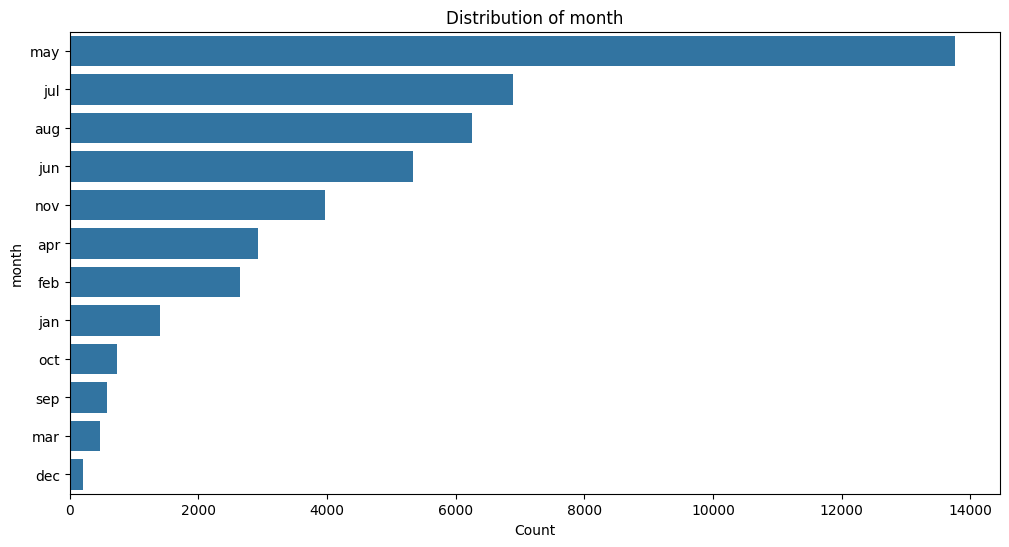

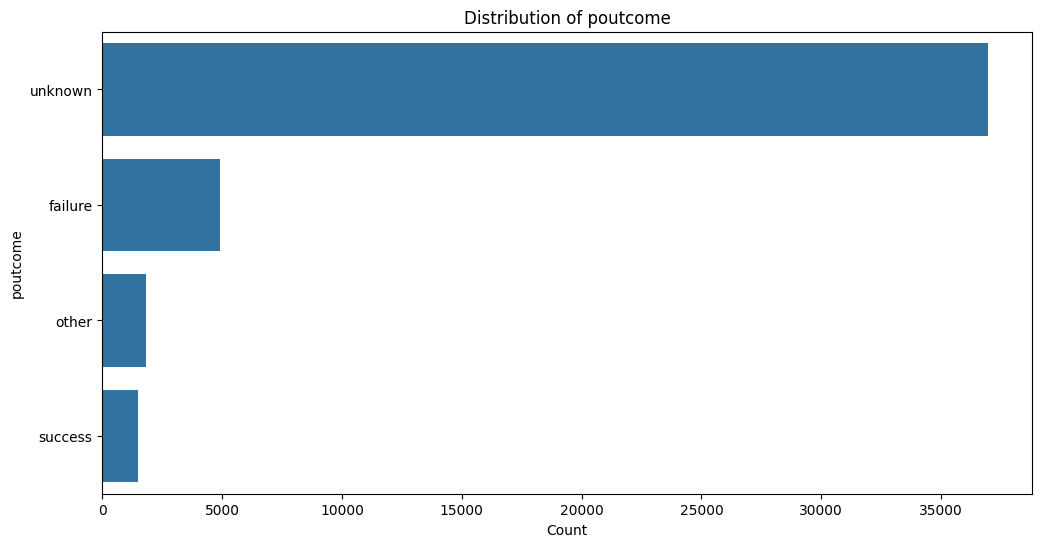

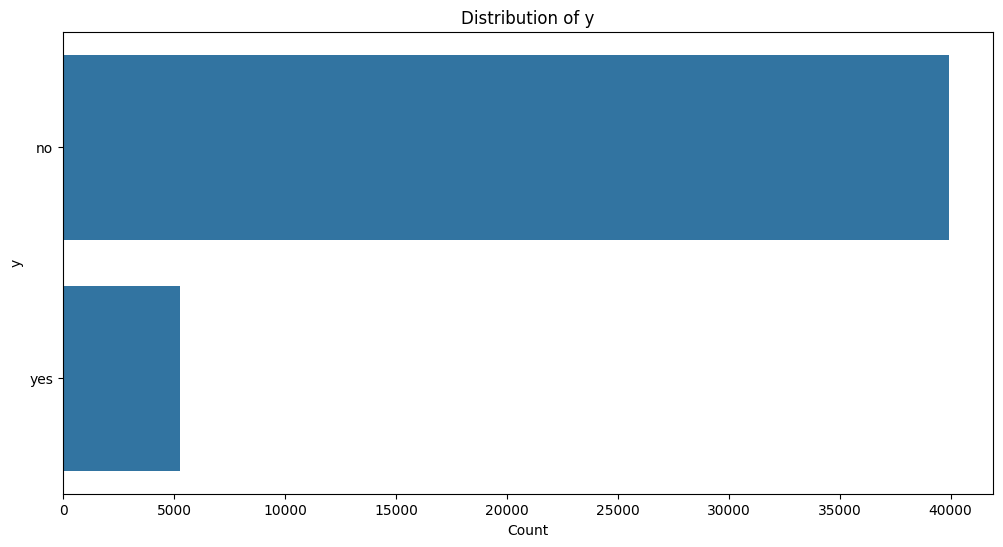

In [73]:
# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Create horizontal bar plots for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=data[column], order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

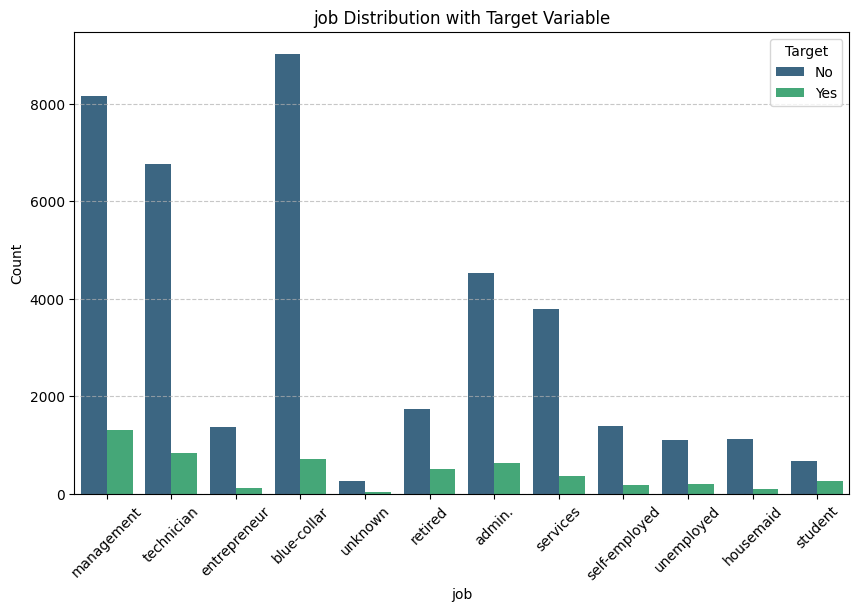

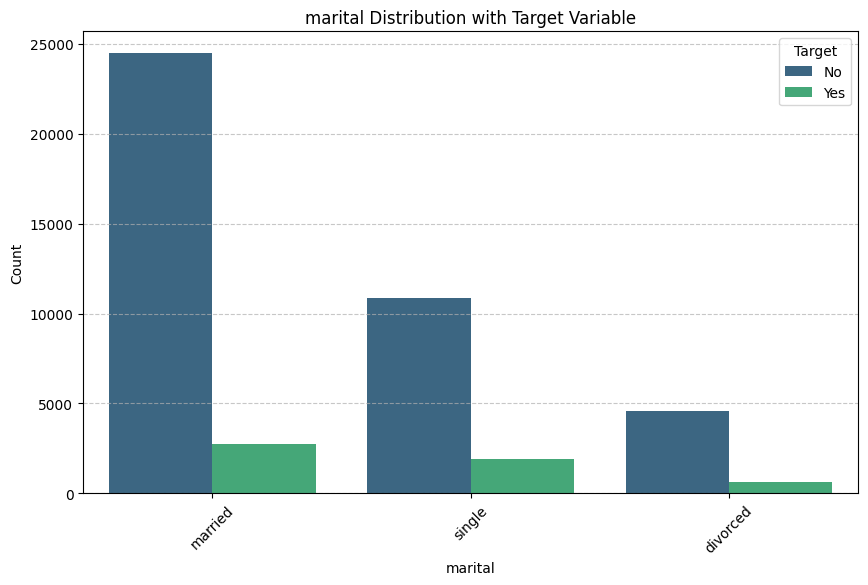

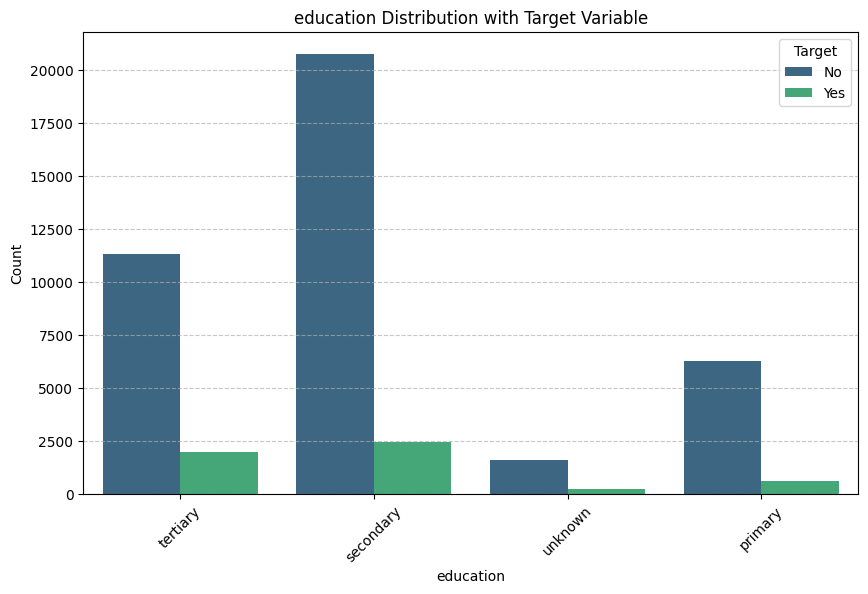

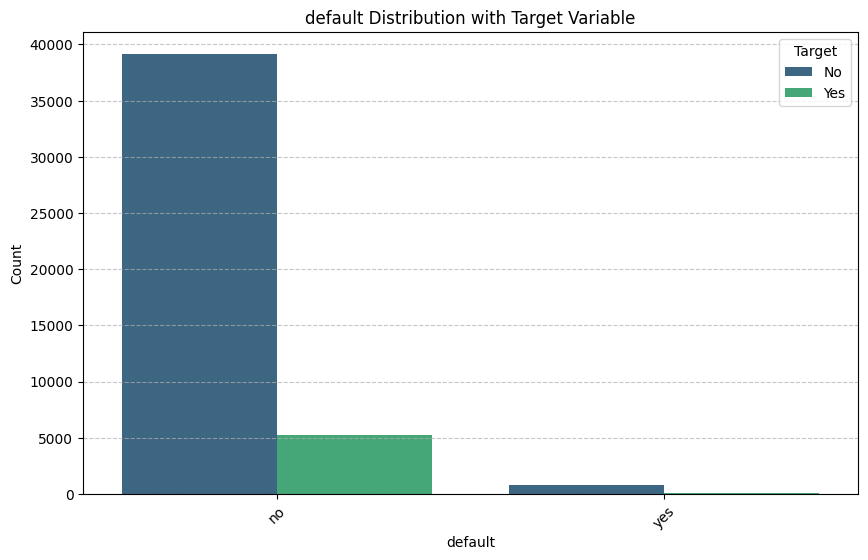

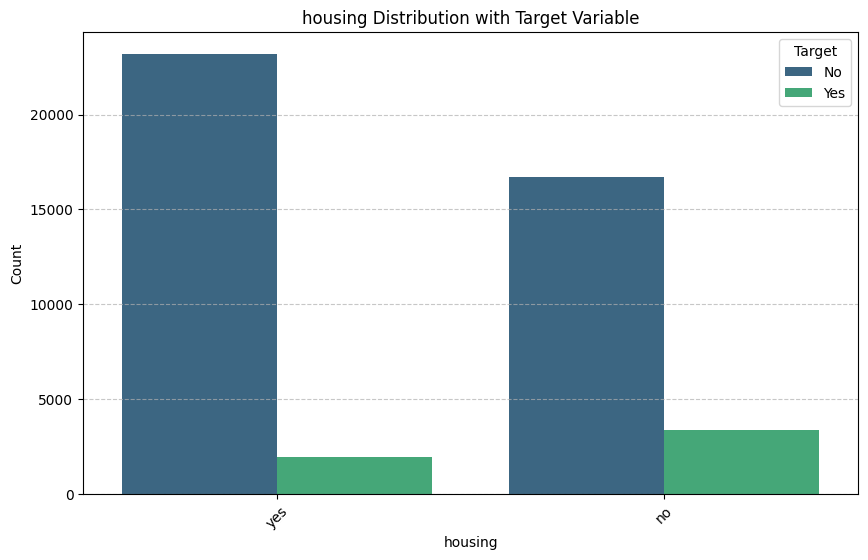

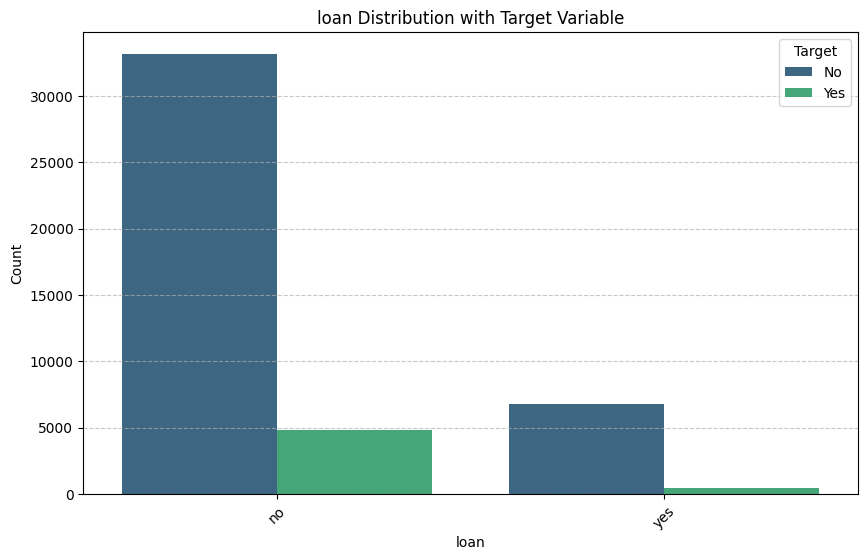

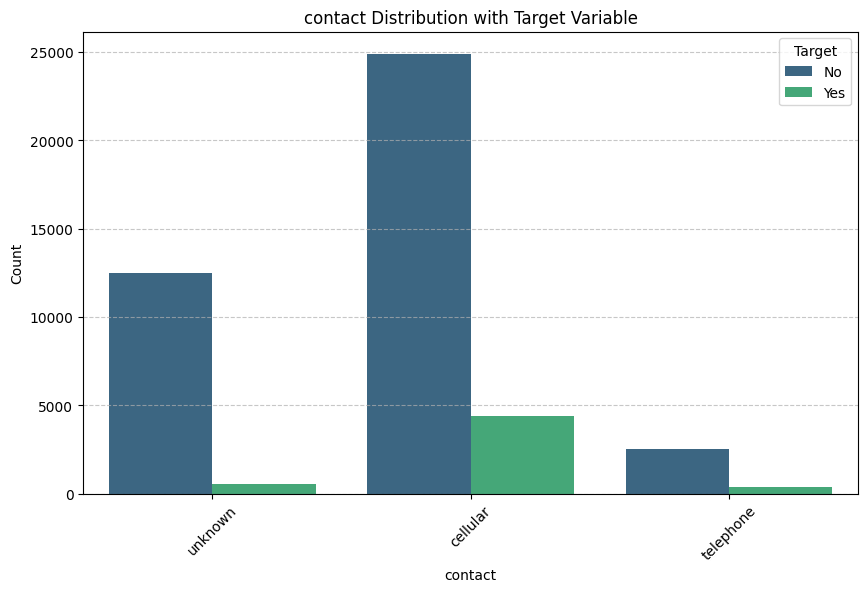

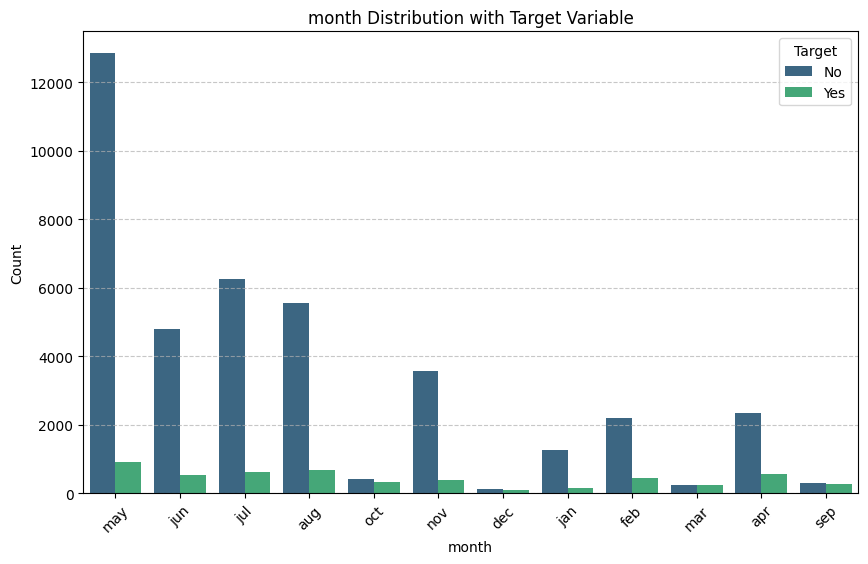

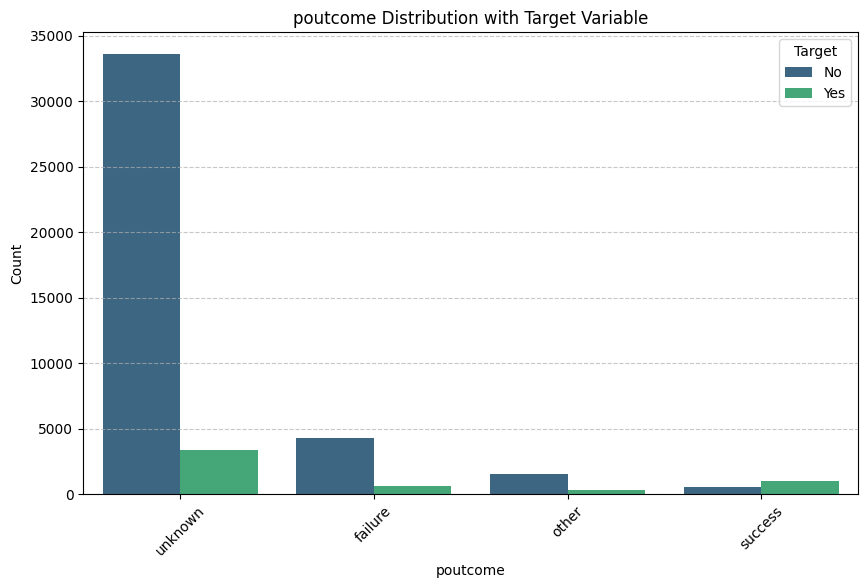

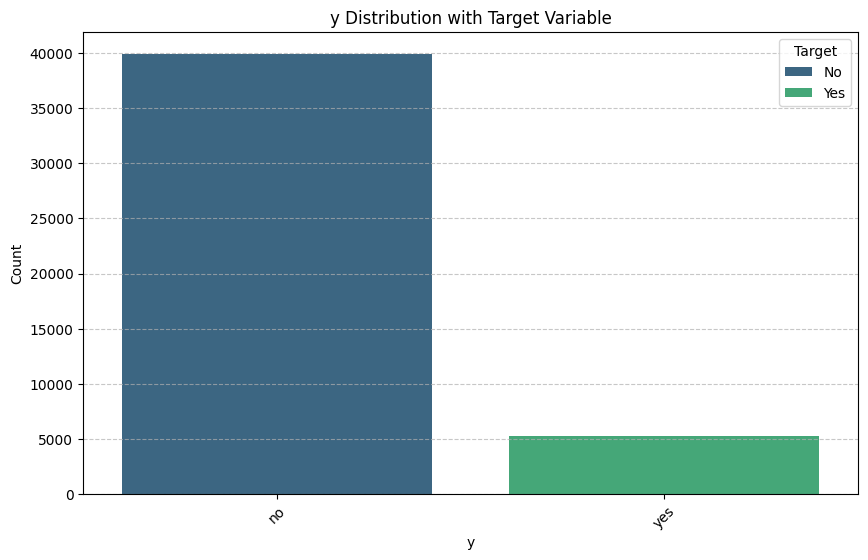

In [74]:
# Distribution of categorical variables with target variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, hue='y', palette='viridis')
    plt.title(f'{col} Distribution with Target Variable')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['No', 'Yes'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()

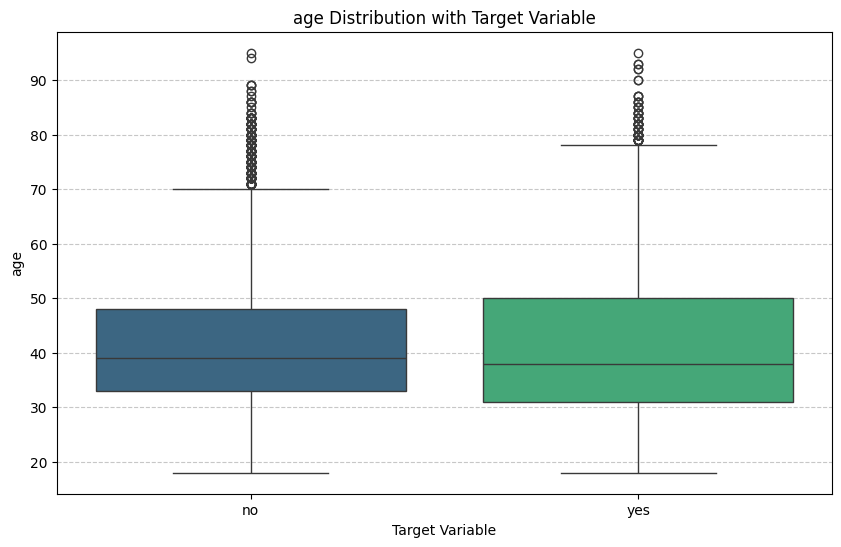

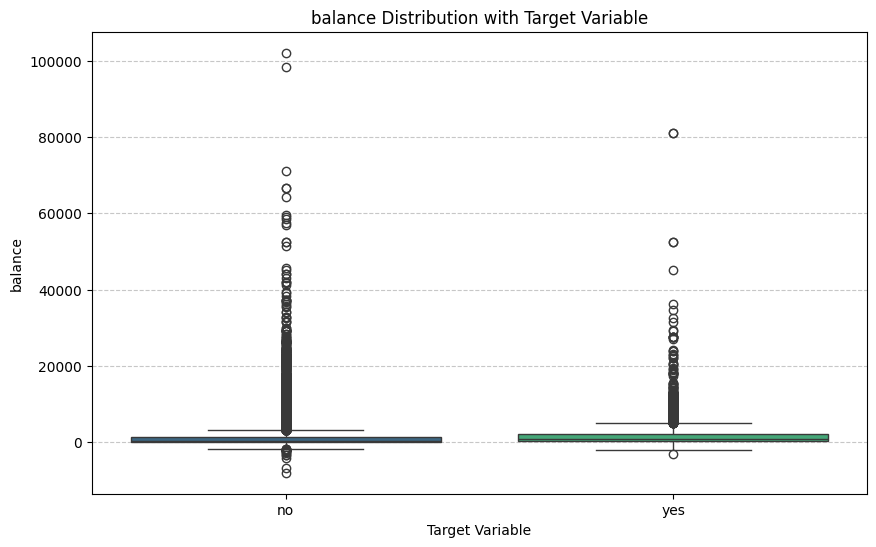

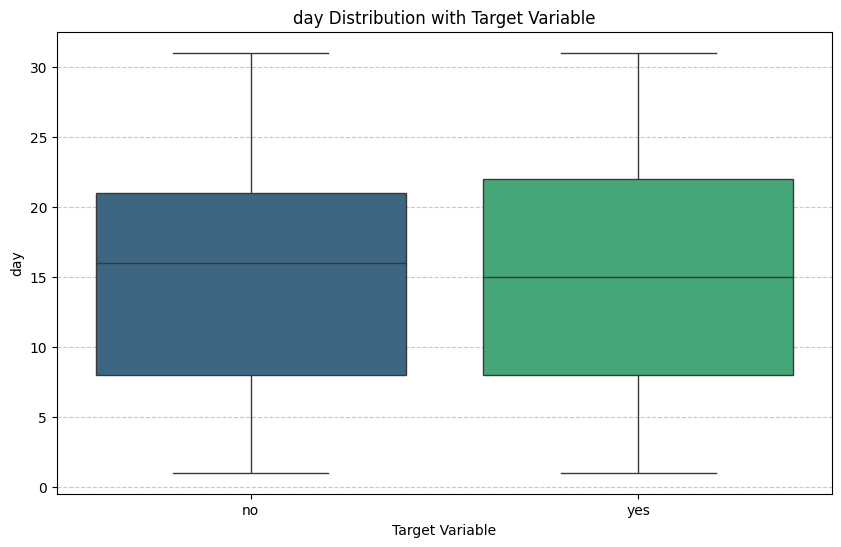

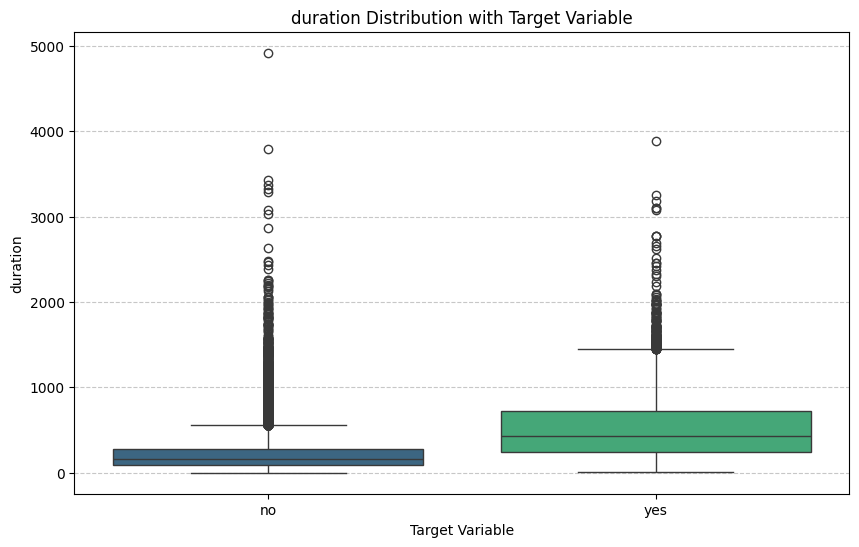

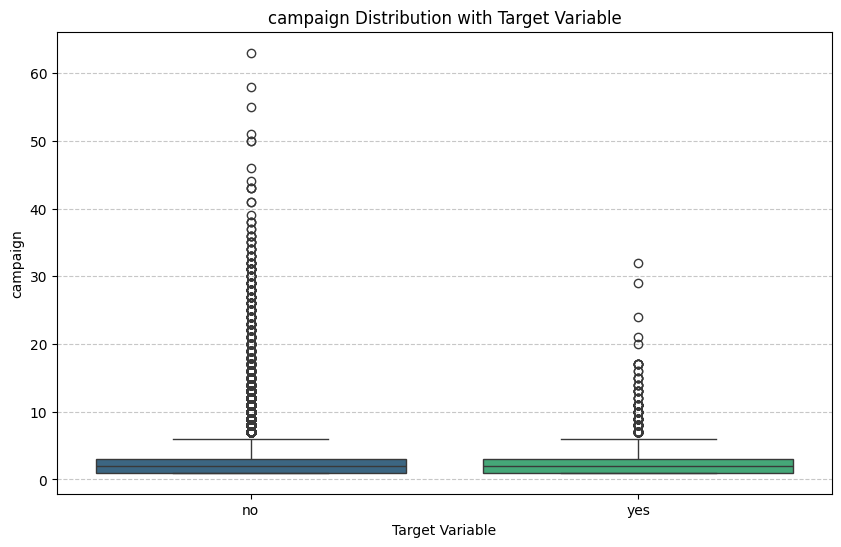

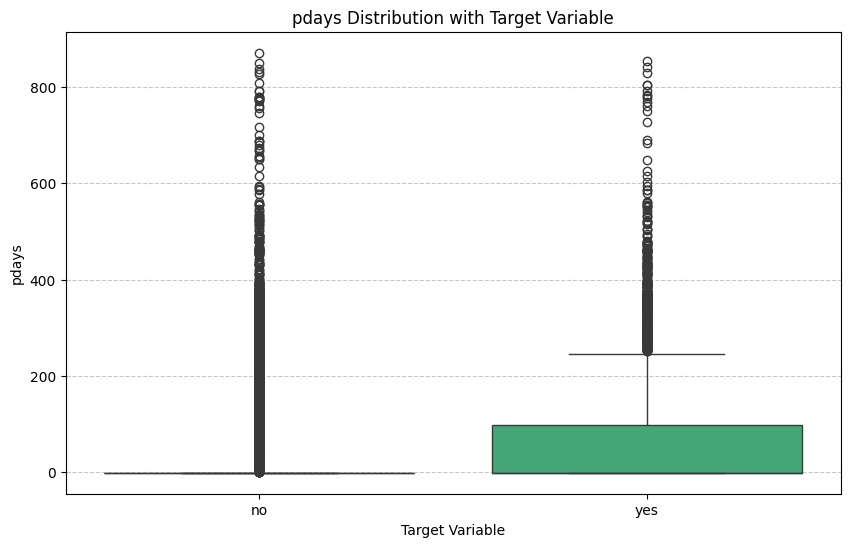

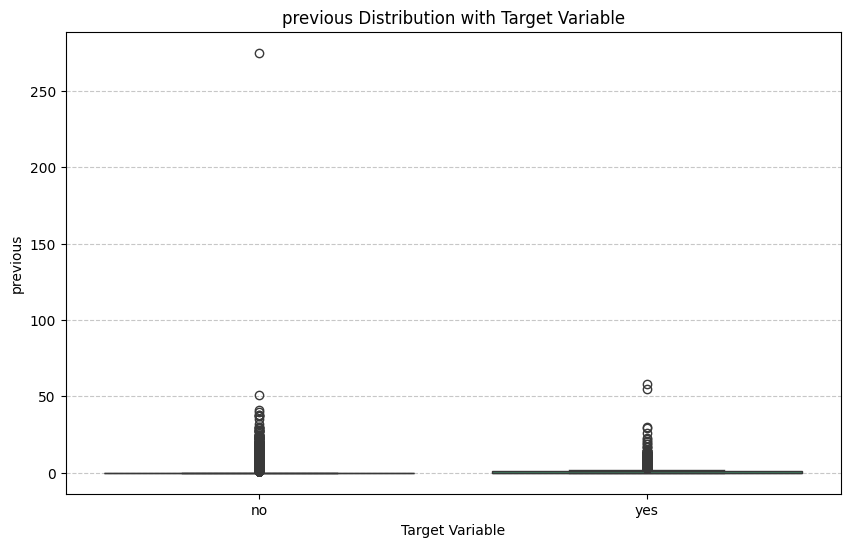

In [75]:
# Distribution of numerical variables with target variable
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='y', y=col, palette='viridis')
    plt.title(f'{col} Distribution with Target Variable')
    plt.xlabel('Target Variable')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

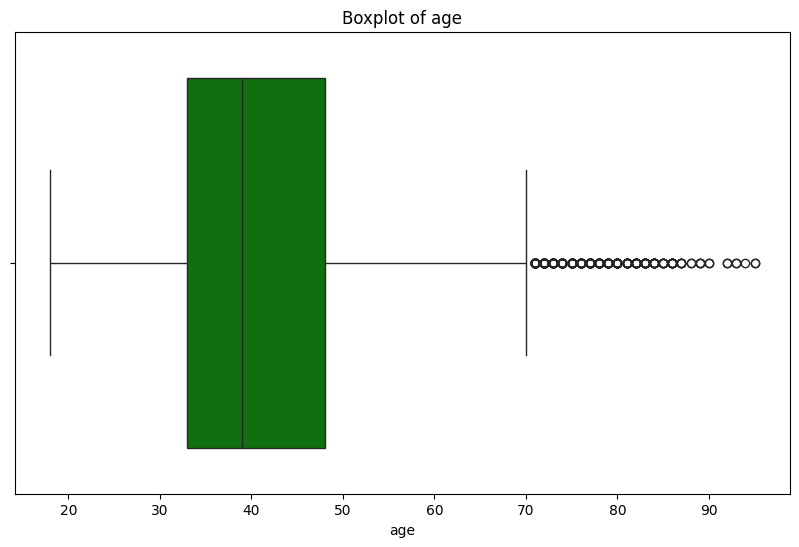

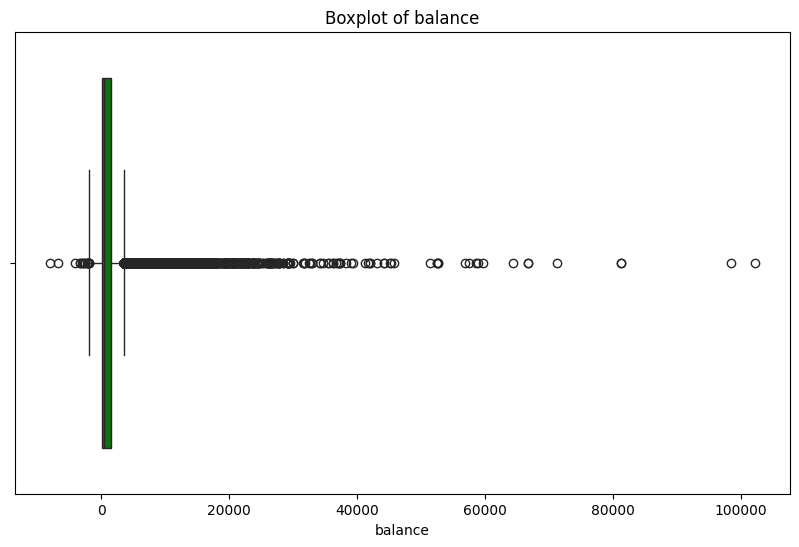

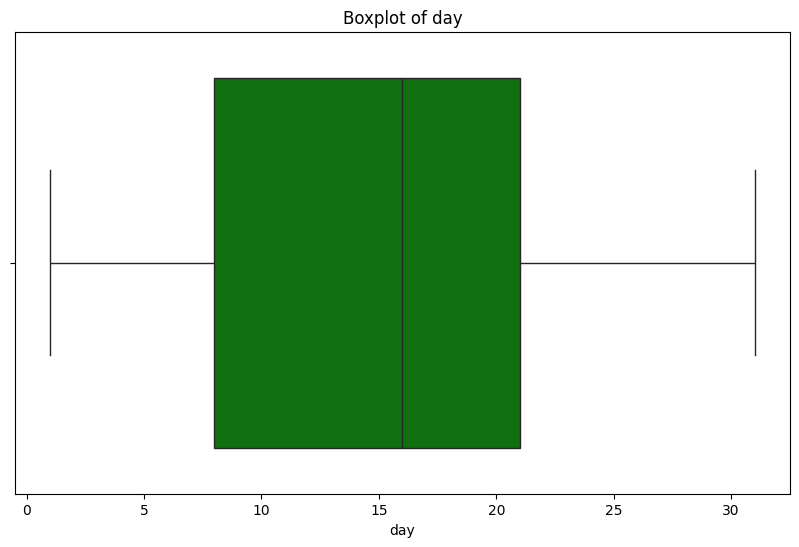

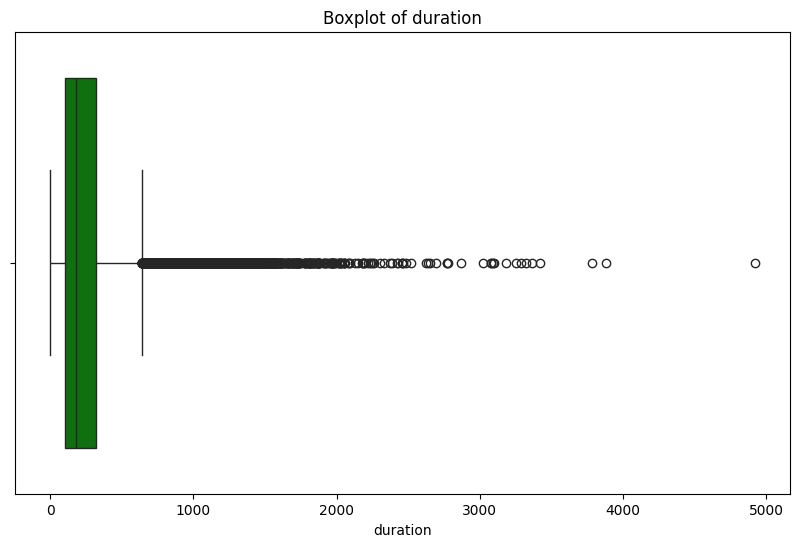

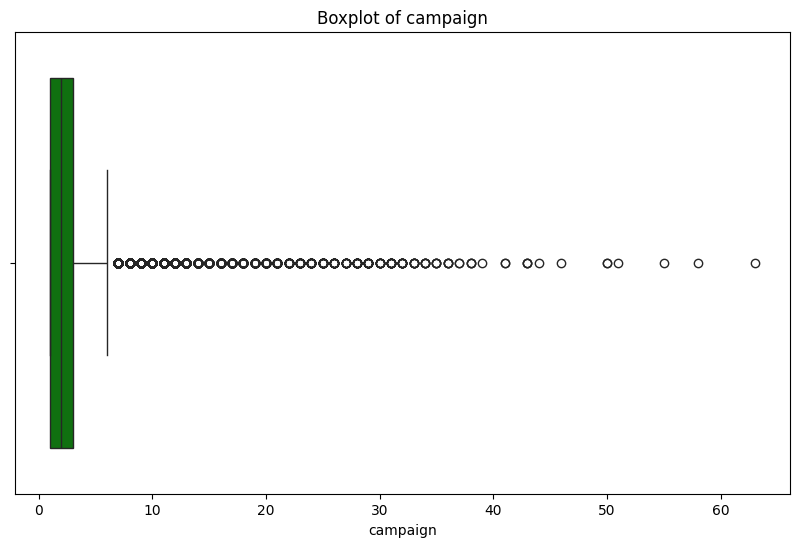

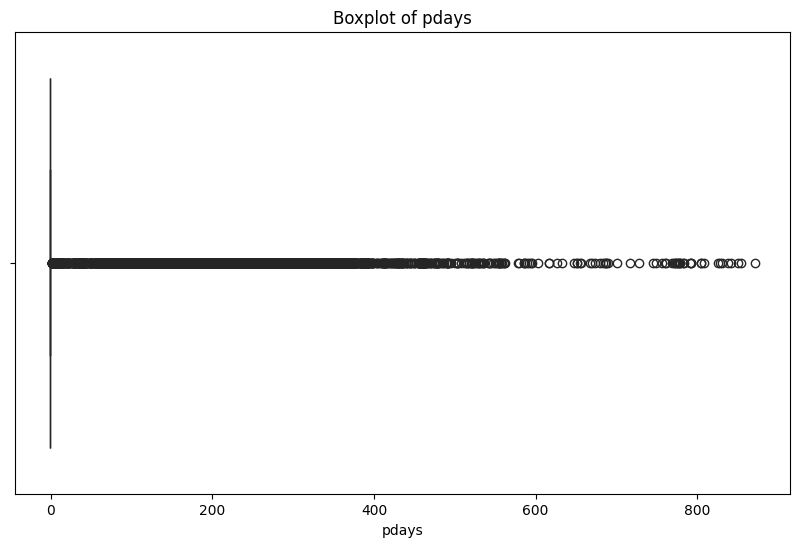

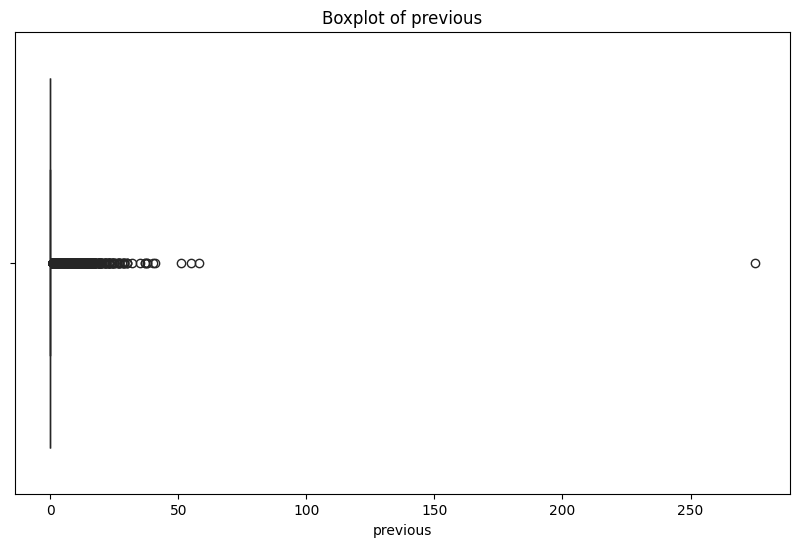

In [76]:
# Create and display box plots one by one
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column], color='green')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [77]:
# Function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

# List of numerical columns
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Selectively apply capping to numerical columns
for column in numerical_columns:
    if column in ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']:
        data = cap_outliers(data, column)

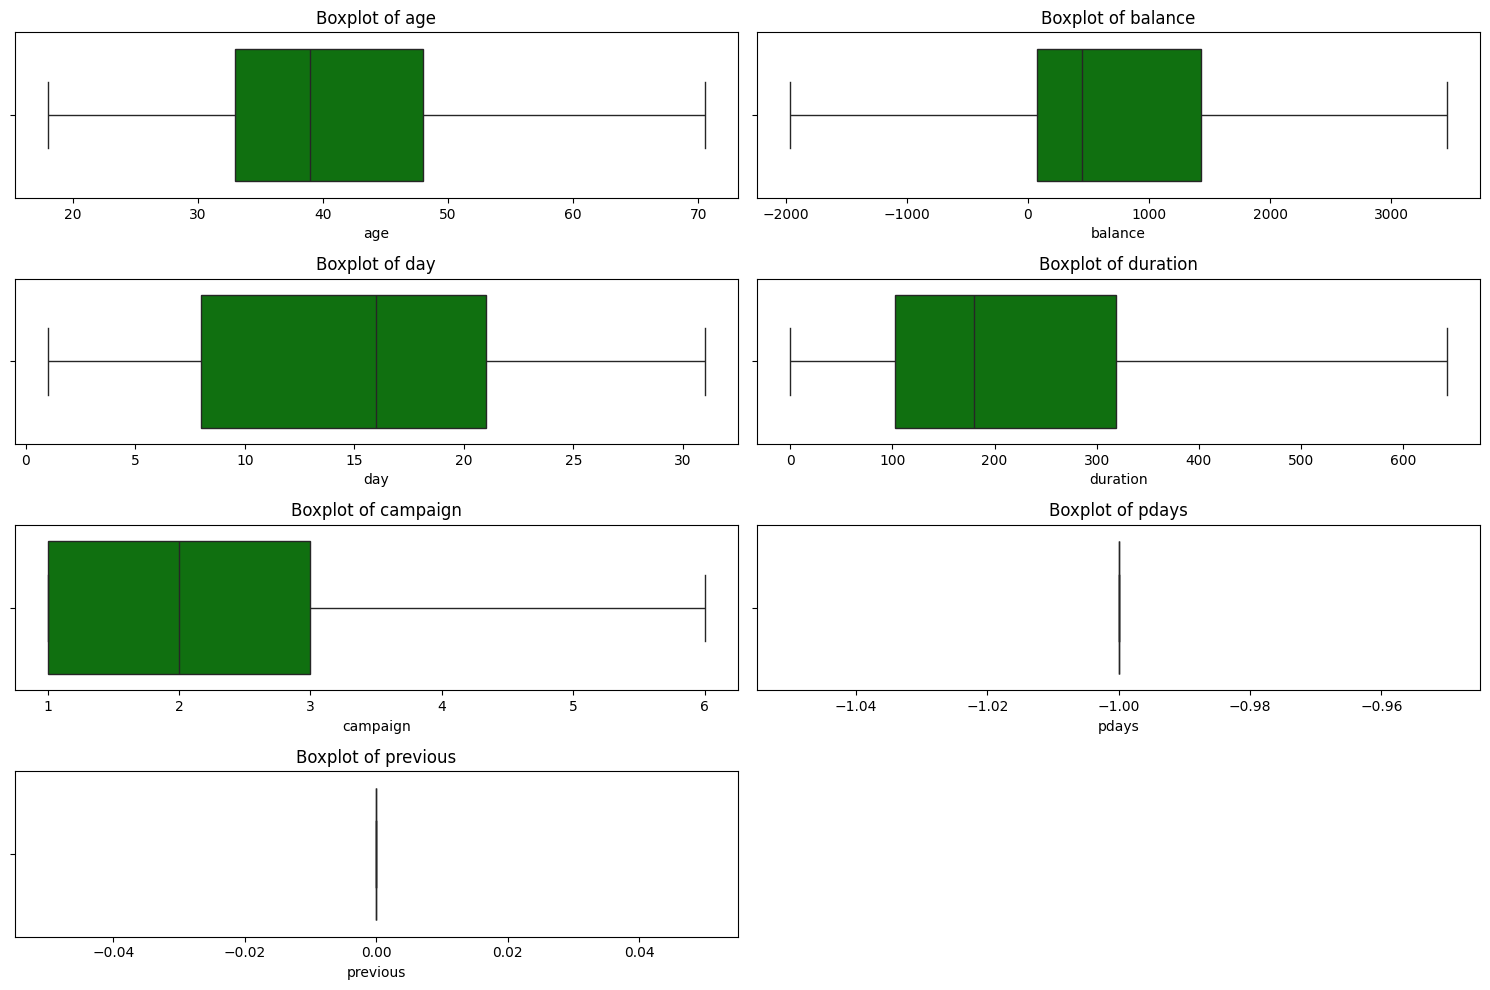

In [78]:
# Create a figure to display all boxplots in one picture
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 2 + 1, 2, i)
    sns.boxplot(x=data[column], color='green')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()


In [79]:
# Display unique entries of each categorical column
for column in categorical_columns:
    unique_entries = data[column].unique()
    print(f"Unique entries in '{column}': {unique_entries}")

Unique entries in 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique entries in 'marital': ['married' 'single' 'divorced']
Unique entries in 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Unique entries in 'default': ['no' 'yes']
Unique entries in 'housing': ['yes' 'no']
Unique entries in 'loan': ['no' 'yes']
Unique entries in 'contact': ['unknown' 'cellular' 'telephone']
Unique entries in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique entries in 'poutcome': ['unknown' 'failure' 'other' 'success']
Unique entries in 'y': ['no' 'yes']


In [80]:
# one-Hot Encoding for Nominal Categorical Variables
data = pd.get_dummies(data, columns=['job', 'marital', 'contact','poutcome'], drop_first=True)

# Ordinal Encoding for education
education_mapping = {'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}
data['education'] = data['education'].map(education_mapping)

#Binary Encoding for default, housing, loan and y
binary_columns = ['default', 'housing', 'loan', 'y']
for column in binary_columns:
    data[column] = data[column].map({'yes': 1, 'no': 0})

# Ordinal Encoding for month
month_mapping = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
data['month'] = data['month'].map(month_mapping)

boolean_columns = data.select_dtypes(include=['bool']).columns
data[boolean_columns] = data[boolean_columns].astype(int)

print(data.head())

    age  education  default  balance  housing  loan  day  month  duration  \
0  58.0          3        0   2143.0        1     0    5      5     261.0   
1  44.0          2        0     29.0        1     0    5      5     151.0   
2  33.0          2        0      2.0        1     1    5      5      76.0   
3  47.0          0        0   1506.0        1     0    5      5      92.0   
4  33.0          0        0      1.0        0     0    5      5     198.0   

   campaign  ...  job_technician  job_unemployed  job_unknown  \
0       1.0  ...               0               0            0   
1       1.0  ...               1               0            0   
2       1.0  ...               0               0            0   
3       1.0  ...               0               0            0   
4       1.0  ...               0               0            1   

   marital_married  marital_single  contact_telephone  contact_unknown  \
0                1               0                  0                1  

In [81]:
data.dtypes

,0
age,float64
education,int64
default,int64
balance,float64
housing,int64
loan,int64
day,int64
month,int64
duration,float64
campaign,float64
